# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

30: Added feature: 23, Score: 0.9507995652848935


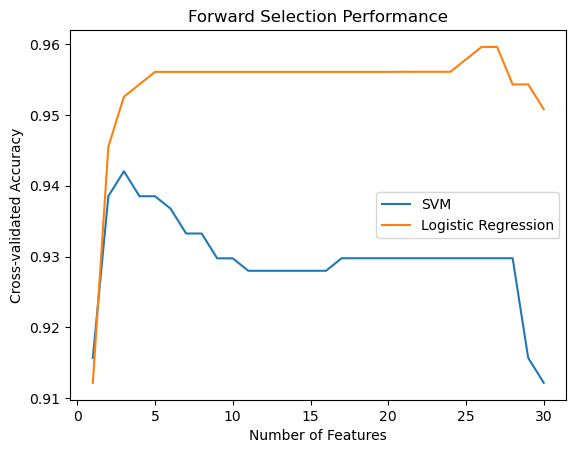

In [51]:
from sklearn.model_selection import cross_val_score

svc = svm.SVC()
log_reg = LogisticRegression(max_iter=10000)


def forward_selection(X, y, model, max_features=30):
    selected_features = []
    remaining_features = list(range(X.shape[1]))
    best_scores = []
    
    for i in range(max_features):
        best_score = 0
        best_feature = None
        for feature in remaining_features:
            current_features = selected_features + [feature]
            score = np.mean(cross_val_score(model, X[:, current_features], y, cv=5))
            if score > best_score:
                best_score = score
                best_feature = feature
        
        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_scores.append(best_score)
            clear_output(wait=True)
            print(f'{i+1}: Added feature: {best_feature}, Score: {best_score}')
    
    return selected_features, best_scores

selected_features_svc, scores_svc = forward_selection(X, y, svc, max_features=30)
selected_features_log_reg, scores_log_reg = forward_selection(X, y, log_reg, max_features=30)

# Plot results
plt.plot(range(1, len(scores_svc) + 1), scores_svc, label='SVM')
plt.plot(range(1, len(scores_log_reg) + 1), scores_log_reg, label='Logistic Regression')
plt.xlabel("Number of Features")
plt.ylabel("Cross-validated Accuracy")
plt.title("Forward Selection Performance")
plt.legend()
plt.show()

# Backward elimination (2pts)

29: Removed feature: 21, Score: 0.912156497438286


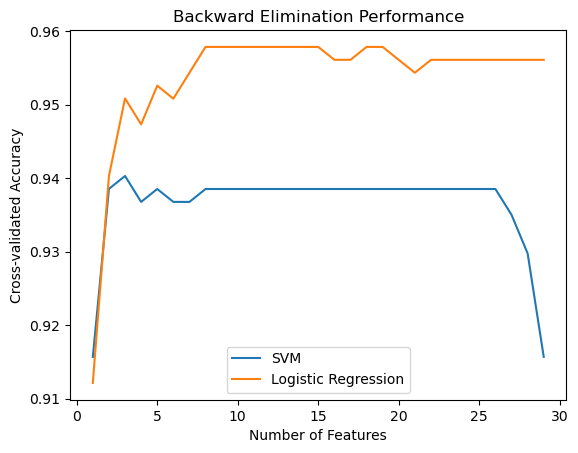

In [52]:
svc = svm.SVC()
log_reg = LogisticRegression(max_iter=10000)

def backward_elimination(X, y, model, min_features=1):
    selected_features = list(range(X.shape[1]))
    best_scores = []
    i = 1
    while len(selected_features) > min_features:
        best_score = 0
        worst_feature = None
        
        for feature in selected_features:
            current_features = [f for f in selected_features if f != feature]
            score = np.mean(cross_val_score(model, X[:, current_features], y, cv=5))
            if score > best_score:
                best_score = score
                worst_feature = feature
        
        if worst_feature is not None:
            selected_features.remove(worst_feature)
            best_scores.append(best_score)
            clear_output(wait=True)
            print(f'{i}: Removed feature: {worst_feature}, Score: {best_score}')
        i += 1
    
    return selected_features, best_scores

# Apply backward elimination for both models
selected_features_svc_backward, scores_svc_backward = backward_elimination(X, y, svc, min_features=1)
selected_features_log_reg_backward, scores_log_reg_backward = backward_elimination(X, y, log_reg, min_features=1)

# Plot results
plt.plot(range(len(scores_svc_backward), 0, -1), scores_svc_backward, label='SVM')
plt.plot(range(len(scores_log_reg_backward), 0, -1), scores_log_reg_backward, label='Logistic Regression')
plt.xlabel("Number of Features")
plt.ylabel("Cross-validated Accuracy")
plt.title("Backward Elimination Performance")
plt.legend()
plt.show()

# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

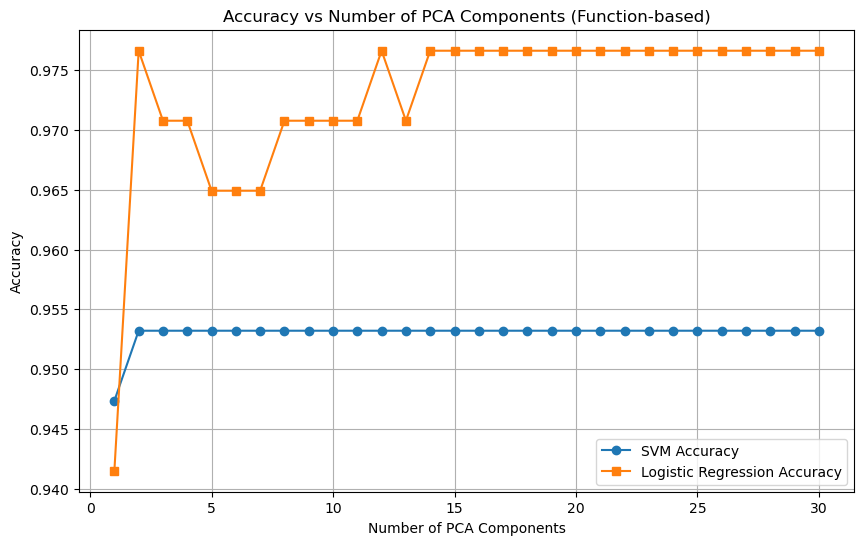

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svc = svm.SVC()
log_reg = LogisticRegression(max_iter=10000)

def evaluate_model_with_pca(X, y, model, max_components = 30):
    
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    components = range(1, max_components + 1)
    accuracies = []

    for n_components in components:
        # Применение PCA
        pca = decomposition.PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Обучение модели
        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_pca)

        # Оценка точности
        accuracies.append(accuracy_score(y_test, y_pred))

    return list(components), accuracies

# Пример использования функции
components, svm_accuracies = evaluate_model_with_pca(X, y, svc, max_components = 30)
components, logreg_accuracies = evaluate_model_with_pca(X, y, log_reg, max_components = 30)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(components, svm_accuracies, label="SVM Accuracy", marker='o')
plt.plot(components, logreg_accuracies, label="Logistic Regression Accuracy", marker='s'
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of PCA Components (Function-based)")
plt.legend()
plt.grid()
plt.show()

#  Выводы (1pts)

Данных оч мало, и получается, что при увеличении числа измерений сначала качество растёт (может быть скачкообразно, но растёт), но начиная где-то с 23-25 качество перестаёт улучшаться, а то и падает(